<a href="https://colab.research.google.com/github/Kotzly/DS4H_Course/blob/entrega_final/notebooks/DS4H_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Entrega 2**#

## **Alunos**

**Silvia Arantes Pereira Olivio, RA: 224932**<p>
**Paulo Augusto Alves Luz Viana, RA: 263889**<p>
**Débora Rocha Helfstein, RA: 234934**<p>
**Charles M'poca Charles, RA: 163383** 

# Configuração do ambiente

 - Instalação do pacote `ds4h`, que contém as dependências e funções do projeto

In [1]:
!git clone https://github.com/Kotzly/DS4H_Course.git -b entrega_final
!pip install ./DS4H_Course/src

Cloning into 'DS4H_Course'...
remote: Enumerating objects: 617, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 617 (delta 42), reused 18 (delta 8), pack-reused 541
Receiving objects: 100% (617/617), 6.01 MiB | 20.57 MiB/s, done.
Resolving deltas: 100% (378/378), done.
Processing ./DS4H_Course/src
     |████████████████████████████████| 9.5MB 12.8MB/s 
     |████████████████████████████████| 14.5MB 198kB/s 
  Created wheel for ds4h: filename=ds4h-1.0-cp37-none-any.whl size=10559 sha256=733c30fcd67f922d10bf4b2f1cfe051d147e4fe171fe1d391a24af2c13153334
  Stored in directory: /tmp/pip-ephem-wheel-cache-9agdfvya/wheels/be/17/83/657eff07833ce82f22e68094086dc3e4c7931d4acea7f32a7e
  Created wheel for zipfile38: filename=zipfile38-0.0.3-cp37-none-any.whl size=22757 sha256=fb1420d349adba44561afd86f26fdafbd7eddfeb8852ff7f08e8415ff135b0a5
  Stored in directory: /root/.cache/pip/wheels/15/7a/ec/508d28bf3894e050aef4d0205cdf27a346e6e0

In [194]:
!pip install torch-optimizer

     |████████████████████████████████| 81kB 5.1MB/s 


In [2]:
!cat DS4H_Course/src/requirements.txt

zipfile38==0.0.3
pandas==1.1.3
numpy==1.19.2
seaborn
matplotlib
simpledbf==0.2.6
jupyter


In [3]:
import ds4h
from ds4h.data.download_sinasc import download_dbc, download_dbf_2020
from ds4h.processing.dbc import dbc_to_csv, dbf_to_csv
from ds4h.processing.csv import join_sinasc_files
from ds4h.processing.sinasc import process_sinasc
from ds4h.data.city_ranking import get_ranking_dataframe, get_top_cities_from_df
from ds4h.processing.sinasc import code_to_str
from ds4h.visualization.sinasc import pct_lineplot, pct_plot

from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
from ds4h.processing.sinasc import SINASC_TRANSLATE_DICT
import pandas as pd


Criação dos diretórios onde serão salvos os arquivos baixados e processados.

In [4]:
dataset_root = Path("/datasets/sinasc")
dbc_path = dataset_root / "dbc"
csv_path = dataset_root / "csv"
dbf_folder = dataset_root / "dbf"

dbf_folder.mkdir(exist_ok=True, parents=True)
csv_path.mkdir(exist_ok=True, parents=True)
dbc_path.mkdir(exist_ok=True, parents=True)

Download dos arquivos DBC, oriundos do DATASUS, dos anos de 2010 até 2019.

In [5]:
download_dbc(dbc_path, years=range(2005, 2019 + 1), n_jobs=8)

Utilização do script `dbc_to_csv.r` para transformação dos arquivos DBC para CSV. O script utiliza a função `read.dbc` para isso, disponível no CRAN.

In [6]:
dbc_to_csv(dbc_path, csv_path);

gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-vB4ZXq/r-base-4.1.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c blast.c -o blast.o
gcc -std=gnu99 -I"/usr/share/R/include" -DNDEBUG      -fpic  -g -O2 -fdebug-prefix-map=/build/r-base-vB4ZXq/r-base-4.1.0=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -g  -c dbc2dbf.c -o dbc2dbf.o
gcc -std=gnu99 -shared -L/usr/lib/R/lib -Wl,-Bsymbolic-functions -Wl,-z,relro -o read.dbc.so blast.o dbc2dbf.o -L/usr/lib/R/lib -lR
[1] "/datasets/sinasc/dbc//DNSP2005.dbc"
[1] "/datasets/sinasc/dbc//DNSP2006.dbc"
[1] "/datasets/sinasc/dbc//DNSP2007.dbc"
[1] "/datasets/sinasc/dbc//DNSP2008.dbc"
[1] "/datasets/sinasc/dbc//DNSP2009.dbc"
[1] "/datasets/sinasc/dbc//DNSP2010.dbc"
[1] "/datasets/sinasc/dbc//DNSP2011.dbc"
[1] "/datasets/sinasc/dbc//DNSP2012.dbc"
[1] "/datasets/sinasc/dbc//DNSP2013.dbc"
[1] "/datasets/si

Aqui o dataset com os dados de 2020 é baixado. Ele é baixado separadamente pois não está no mesmo repositório que os outros anos. Adicionalmente, o arquivo está no formato DBF, que pode ser transformado para a extensão CSV utilizando a biblioteca `simpledbf`.

In [7]:
download_dbf_2020(dbf_folder)

dbf_filepath = list(dbf_folder.glob("*.DBF"))[0]
dbf_to_csv(dbf_filepath, csv_path)

Aquios arquivos CSV são unidos em um único Dataframe.

In [8]:
union_df = join_sinasc_files(csv_path)
union_df

Loading DNSP2018.csv
Loading DNSP2012.csv
Loading DNSP2009.csv
	File did not have column RACACORMAE, filling with NaN's.
Loading DNSP2008.csv
	File did not have column RACACORMAE, filling with NaN's.
Loading DNSP2017.csv
Loading DNBR20DA.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Loading DNSP2014.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Loading DNSP2013.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Loading DNSP2015.csv
Loading DNSP2006.csv
	File did not have column RACACORMAE, filling with NaN's.
Loading DNSP2007.csv
	File did not have column RACACORMAE, filling with NaN's.
Loading DNSP2011.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Loading DNSP2010.csv
Loading DNSP2005.csv
	File did not have column RACACORMAE, filling with NaN's.
Loading DNSP2019.csv


,DTNASC,QTDFILVIVO,QTDFILMORT,IDADEMAE,RACACOR,RACACORMAE,CODMUNNASC,ESTCIVMAE,ESCMAE,PARTO,IDANOMAL,GESTACAO
0,6012018,0.0,0.0,32.0,4.0,4.0,140010,2.0,4.0,2.0,2.0,5.0
1,22052018,1.0,0.0,23.0,4.0,4.0,150130,5.0,4.0,2.0,2.0,5.0
2,14042018,0.0,0.0,22.0,1.0,1.0,150140,5.0,4.0,2.0,2.0,4.0
3,12032018,1.0,0.0,23.0,4.0,4.0,150170,1.0,4.0,1.0,2.0,5.0
4,7042018,3.0,0.0,33.0,4.0,4.0,170950,1.0,5.0,1.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
583186,5122019,2.0,0.0,27.0,4.0,4.0,520870,1.0,4.0,2.0,2.0,6.0
583187,1082019,0.0,0.0,31.0,1.0,1.0,530010,5.0,5.0,1.0,2.0,5.0
583188,17092019,1.0,0.0,33.0,2.0,2.0,530010,1.0,5.0,2.0,2.0,5.0
583189,22112019,1.0,0.0,33.0,4.0,4.0,530010,2.0,5.0,2.0,2.0,5.0


# Seleção da amostra (municípios)

A seleção dos municípios para avaliação do indicador de saúde materna, foi baseado no método PROMETHEE.  O Promethee é um método de apoio a decisão baseada em multicritérios. Para a análise do impacto da pandemia da COVID-19 no número de nascidos vivos no estado de São Paulo e seus municípios, foram definidos os seguintes critérios (indicadores) para a construção do ranking Promethee:
⦁	Taxa de Incidência da COVID-19;
⦁	Taxa de prevalência da COVID-19;
⦁	Taxa de letalidade por COVID-19.

Os municípios foram comparados um para um (todos com todos) em cada um dos indicadores acima descrito, recebendo melhor pontuação (1) o município com pior desempenho do indicador sob avaliação. As regras definidas foram:

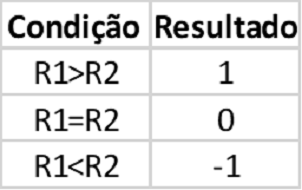

Onde `R1` é o indicador de um município e `R2` é o indicador do outro. A pontuação final de um município é a soma de todos as pontuações. Por exemplo, se houve 100 municíos no total \{M1, M2, ..., M100\}, a pontuação máxima de um município será 3 * 99 (dos três indicadores e da sua comparação com os outros 99 municípios). O código para este método está em `ds4h.data.city_ranking`.

Após o estabelecimento do ranking, foram selecionados, incialmente, dez municípios com pior classificação e com número de habitantes igual ou superior a 30000. Adicionalmente, foi incluído a este grupo a capital do estado de São Paulo, o município de São Paulo, para avaliação mais detalhada dos indicadores de saúde materna. 


In [9]:
df = get_ranking_dataframe()
cities_dict = get_top_cities_from_df(df)
print(cities_dict)

{354880: 'São Caetano do Sul', 351440: 'Dracena', 352480: 'Jales', 354680: 'Santa Isabel', 350210: 'Andradina', 354980: 'São Josã do Rio Preto', 354850: 'Santos', 350570: 'Barueri', 351740: 'Guaãra', 350280: 'Araãatuba', 355030: 'São Paulo'}



É possível ver que para cada coluna existem valores que não são esperados, ou que são equivalentes a valores faltantes. Por exemplo, para a coluna `ESCMAE` o valor 9 representa um valor ignorado, que não foi preenchido. Para a coluna `IDADEMAE`, o valor de 99 parece ser um erro, já que antes dele o maior valor de idade foi 65. Para a coluna `QTDFILVIVO` (quantidade de filhos vivos), apesar do número 30 também parecer absurdo, o número 99 também parece ser um erro.



In [10]:
union_df.columns

Index(['DTNASC', 'QTDFILVIVO', 'QTDFILMORT', 'IDADEMAE', 'RACACOR',
       'RACACORMAE', 'CODMUNNASC', 'ESTCIVMAE', 'ESCMAE', 'PARTO', 'IDANOMAL',
       'GESTACAO'],
      dtype='object')

In [11]:
for col in ["ESCMAE", "IDADEMAE", "QTDFILVIVO"]:
  print("Valores distintos da colunas " + col)
  unique = sorted(union_df[col].unique())
  unique = [str(u) for u in unique]
  print(", ".join(unique), end="\n\n")

Valores distintos da colunas ESCMAE
0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 9.0

Valores distintos da colunas IDADEMAE
0.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 64.0, 65.0, 99.0, nan, 63.0

Valores distintos da colunas QTDFILVIVO
0.0, 1.0, 2.0, 3.0, 4.0, nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 30.0, 99.0




Outro tratamento realizado nos dados, foi em relação a data. Os valores plotados estavam sem separação, por exemplo a data 24/05/2020 estava com o valor 24052020 no dataset, ou ainda a data 08/02/2020 estava plotada como 8022020. Para resolver esse caso criamos uma função em Python que transforma os valores para a formatação correta. As funções str_to_datetime, nullify criadas no módulo sinasc.py trata deste caso.

Aqui o Dataframe com todos os dados são processados. O processamento realizado é:
 - A coluna `DTNASC` é processada, pois os dados originais não estão conforme o dicionário de dados fornecido, e a data está no formato de string.
 - A coluna `MUNNAME` é criada, com os nomes das cidades, ao invés do código do munícipio que está originalmente presente.
 - A coluna `AGEGROUP` é criada, e tem os valores:
    - 'A1', se IDADEMAE < 20;
    - 'A2', se 20 <= IDADEMAE < 35;
    - 'A3', se IDADEMAE >= 35.
 - As colunas `YEAR`, `MONTH` e `DAY` são criadas, baseando-se na colunas `DTNASC`.
 - O dicionário de dados prevê a existência de valores que foram ignorados, provavelmente não preenchidos. Estes valores foram substituídos por NULL, bem como certo valores estranhos, como o valor de 99 na colunas `IDADEMAE` (idade da mãe). Para as colunas categóricas, as categorias foram codificadas de 1 até N, sendo N o número de categorias. Desta maneira Valores maiores que N foram transformados em NULL, para que depois pudessem ser descartados durante as análises.
    - `QTDFILVIVO`: valores maiores que 30.
    - `QTDFILMORT`: valores maiores que 30.
    - `IDADEMAE`: valores maiores que 65.
    - `ESTCIVMAE`: valores maiores que 5.
    - `PARTO`: valores maiores que 2.
    - `IDANOMAL`: valores maiores que 2.
    - `GESTACAO`: valores maiores que 6.
    - `RACACOR`: valores maiores que 5.
    - `RACACORMAE`: valores maiores que 5.
    - `ESCMAE`: valores maiores que 5.

Em resumo, observamos um dataset bastante consistente em dados, e com porcentagens muito baixas de erro.



In [12]:
df = process_sinasc(union_df, city_code_dict=cities_dict)
df = code_to_str(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # we have an equal len list/ndarray


In [13]:
import numpy as np
def null_proportion(df):
  def null_prop(x):
    return "{:.2f}%".format(x * 100)
  return df.isna().mean(axis=0).apply(null_prop)

Durante o processo de observação das variáveis do dataset, percebemos poucos dados faltantes na base de dados. Ao realizar o cálculo de porcentagem de dados faltantes para cada variável, o maior valor observado estava na variável RACACORMAE que tinha 14% dos dados faltantes, as demais variáveis estavam entre 3 e 0%.
Inicialmente optamos por utilizar o método complete-case analysis, que indica dropar os dados faltantes da base.  Porém quando começamos a realizar a análise da qualidade dos dados, de afim validar possíveis discrepâncias e inconsistências, percebemos variáveis com valores 9 e 99, que segundo a descrição do dicionário de dados são valores ignorados, por isso substituímos estes valores por nulos.

Para que as demais varáveis não fossem comprometidas, decidimos manter os registros com valores nulos no dataset uma vez que a maioria dos métodos estatísticos em python já desconsideram estes valores.

In [14]:
null_proportion(union_df)

DTNASC         0.00%
QTDFILVIVO     2.94%
QTDFILMORT     5.14%
IDADEMAE       0.00%
RACACOR        3.53%
RACACORMAE    36.67%
CODMUNNASC     0.00%
ESTCIVMAE      0.50%
ESCMAE         0.60%
PARTO          0.07%
IDANOMAL       1.32%
GESTACAO       0.74%
dtype: object

Ao recalcular a porcentagem em perda de valores nulos após essa substituição, a variável RACACORMAE chegou a 17%, enquanto as demais variáveis não passavam de 3%. 

In [15]:
null_proportion(df)

DTNASC         0.00%
QTDFILVIVO     0.72%
QTDFILMORT     1.32%
IDADEMAE       0.01%
RACACOR        3.05%
RACACORMAE    39.27%
CODMUNNASC     0.00%
ESTCIVMAE      0.30%
ESCMAE         0.30%
PARTO          0.03%
IDANOMAL       1.05%
GESTACAO       0.26%
MUNNAME        0.00%
AGEGROUP       0.00%
YEAR           0.00%
MONTH          0.00%
DAY            0.00%
dtype: object

Abaixo pode-se ver a distribuição dos dados que tem a coluna de `RACACORMAE` faltante durante os anos. É possível a partir de meados de 2011 que a coluna começou a ser preenchida. Tal fato foi confirmado ao se constatar que o modelo de DN (declaração de nascido) não contava com a informação de raça/cor da mãe até esta data.

Como a falta da informação `RACACORMAE` está ligada ao ano de preenchimento do DN, este caso de dado faltante pode se classificado como *Missing at Random*.

Distribuição dos dados de RACACORMAE faltantes durante os anos


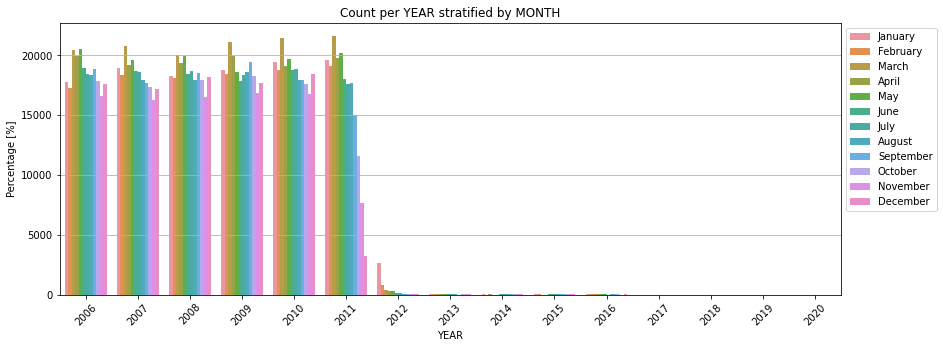

In [16]:
filled = df.fillna("NULL")
filled = filled[filled.RACACORMAE == "NULL"]

print("Distribuição dos dados de RACACORMAE faltantes durante os anos")
pct_plot(filled, "YEAR", "MONTH", percentage=False);

In [17]:
perc = 100 * (1 - (len(df) / len(union_df)))
print("Porcentagem do dataset que foi retirado no processamento: {:.2f}%".format(perc))

Porcentagem do dataset que foi retirado no processamento: 71.70%


In [18]:
df.columns

Index(['DTNASC', 'QTDFILVIVO', 'QTDFILMORT', 'IDADEMAE', 'RACACOR',
       'RACACORMAE', 'CODMUNNASC', 'ESTCIVMAE', 'ESCMAE', 'PARTO', 'IDANOMAL',
       'GESTACAO', 'MUNNAME', 'AGEGROUP', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

Nos plots abaixo podemos ver a progressão do número de nascidos vivos para cada cidade, dos anos de 2010 à 2020. Pode-se verificar, em algumas cidades, uma queda nos anos de 2016/2017. Essa queda pode ter se dado devido à pandemia do Zika vírus, durante a qual houve extensa propaganda para que as mães postergassem a gravidez, entretanto existem cidades em que esse comportamento não é observado. Ao mesmo tempo pode-se ver que tal comportamento não existe para 2020, pelo menos não para o balanço geral do ano, como é mostrado abaixo.

Como a pandemia se iniciou por volta de março, caso haja alguma diferença no número de nascidos vivos, esperar-se-ia que ela aparecesse em novembro/dezembro. Ainda assim é necessário levar em consideração o mês do ano, já que certa sazonalidade no número de nascidos vivos.

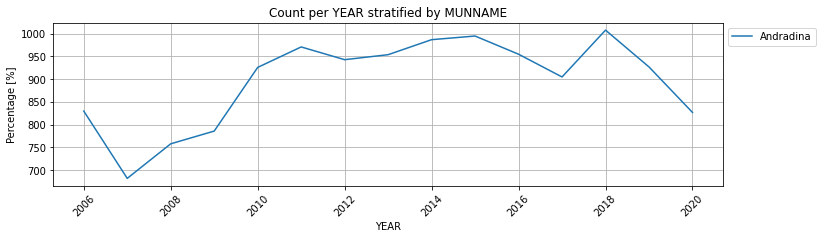

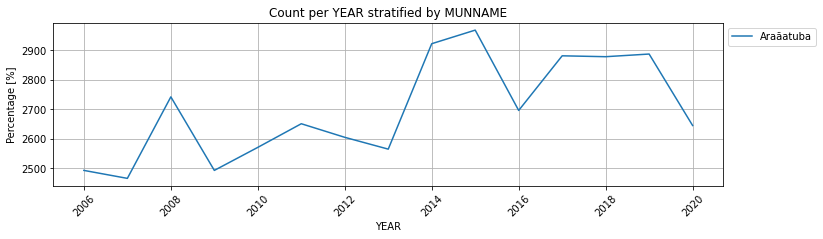

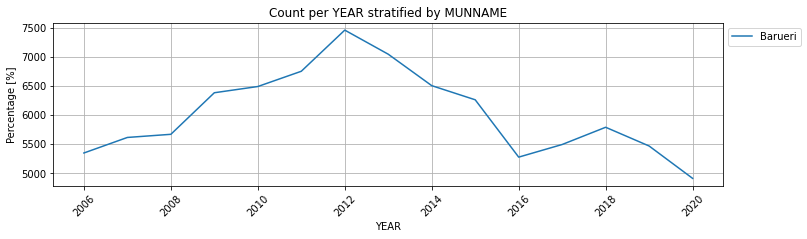

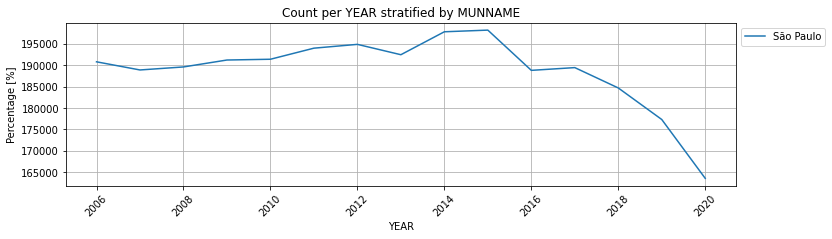

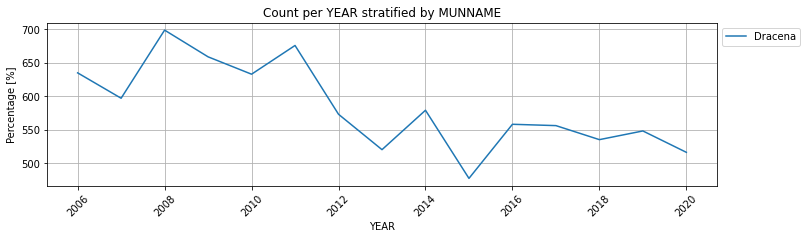

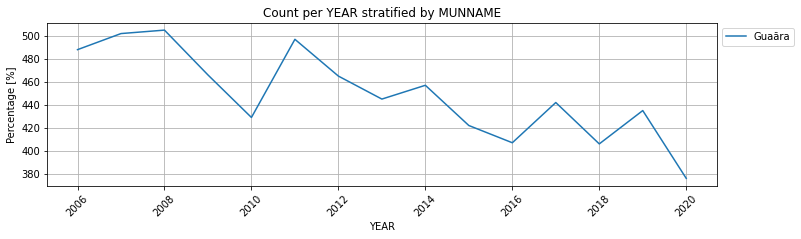

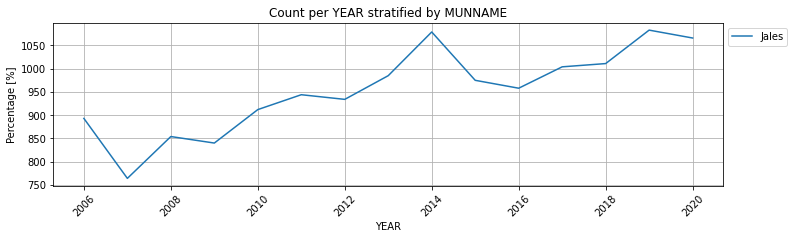

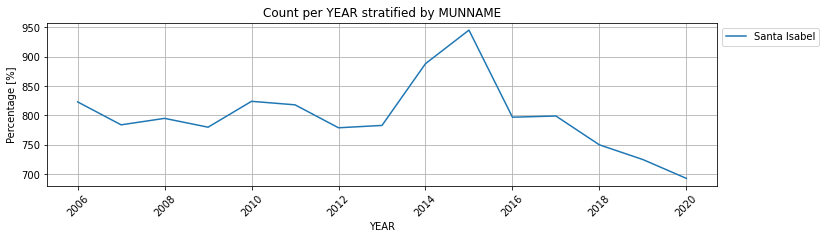

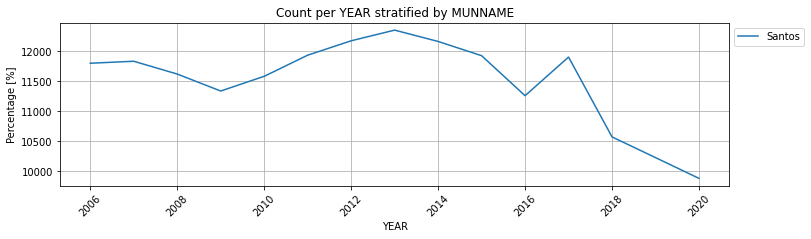

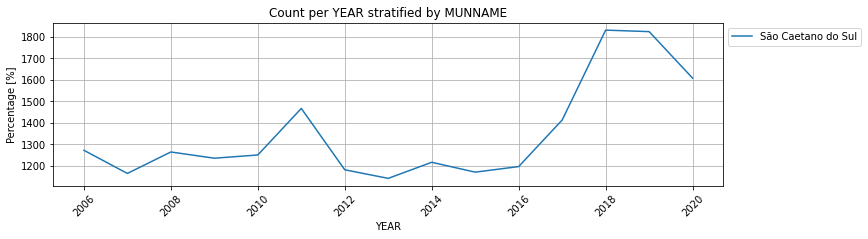

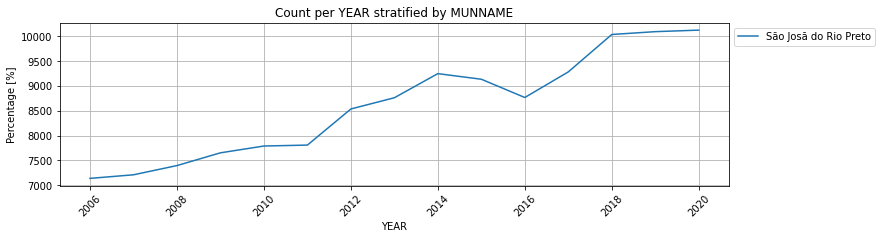

In [19]:
for mun in df.MUNNAME.unique():
  pct_lineplot(df[df.MUNNAME == mun], "YEAR", "MUNNAME", percentage=False, y_logscale=False, figsize=(12, 3));

O arquivos ./assets/AnalysisPrism.pdf mostra os mesmos plots, mas também as tabelas com os números absolutos e médios de nascidos vivos para cada mês, para cada ano. Ele também conta com as barras de desvio padrão para se avaliar a variabilidade destes valores, cidade por cidade.

Os gráficos a seguir mostram os números de nascidos vivos agregados por 2 variáveis categóricas do dataset, descrito no título de cada plot.

Percebe-se que proporcionalmente, a mulheres que tiveram entre 8 e 11 anos de escolaridade são maioria, seguidas das que tiveram 12 ou mais.

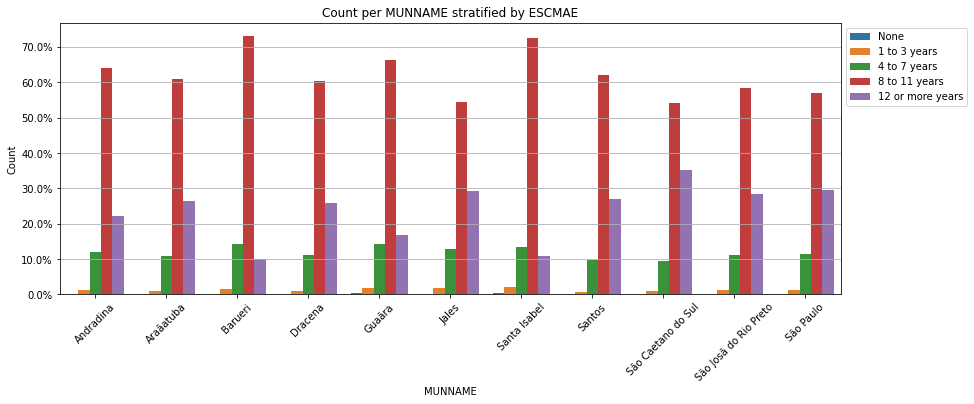

In [20]:
pct_plot(df, "MUNNAME", "ESCMAE", percentage=True);

Observa-se que para todas as cidades avaliadas, exceto Barueri, a maiorio dos bebês tem raça/cor registrada como Branca, seguido pelo pardo.

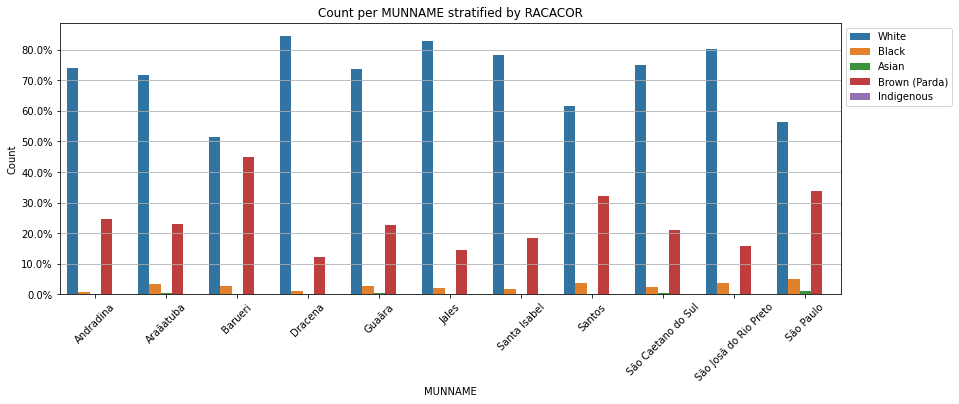

In [21]:
pct_plot(df, "MUNNAME", "RACACOR", percentage=True);

Aqui pode-se ver a diferença entre os números de nascidos vivos, entre as cidades. São Paulo esta pelo menos 1 ordem de grandeza acima das demais cidades. Para algumas cidades já é possível ver certa tendência de crescimento ou decrescimento no número.

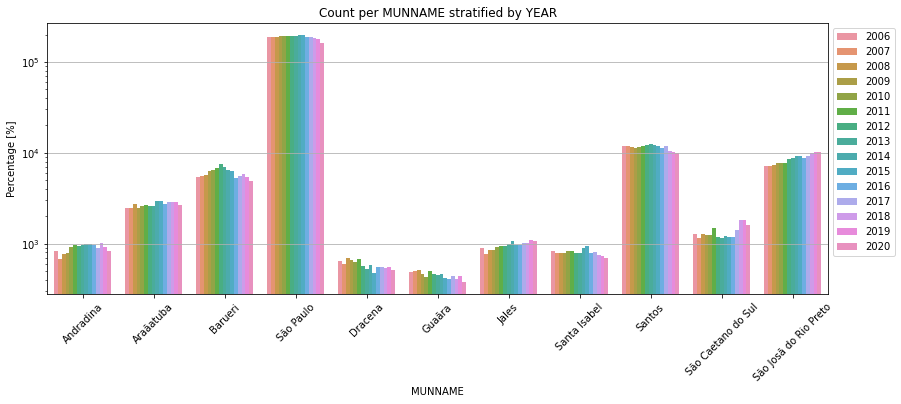

In [22]:
pct_plot(df, "MUNNAME", "YEAR", percentage=False, y_logscale=True);

Neste gráfico pode-se ver que a cada ano que passa a proporção de bebês registrados como brancos diminui, enquanto a de pardos e negros/pretos aumenta. O número de bebês registrados como brancos caiu 20 pontos percentuais no período.

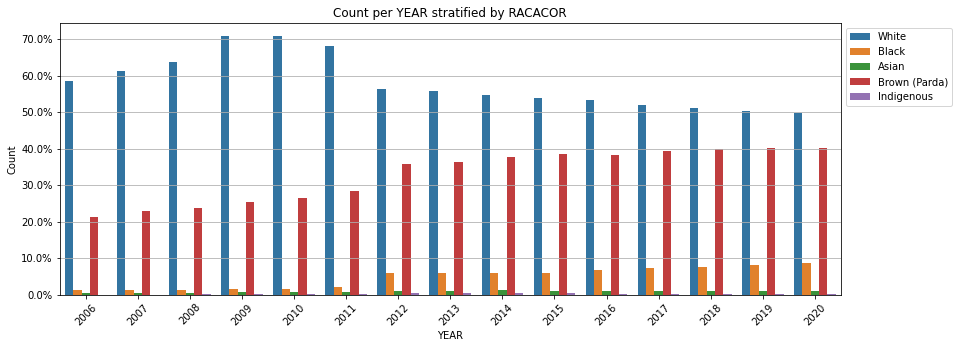

In [23]:
pct_plot(df, "YEAR", "RACACOR", percentage=True);

Este gráfico mostra que o número de mães solteiras é muito próximo do número de mae que são casas, tendências que vem desde 2012. De 2017 para 2020 o número de mães registradas como estando em união estável pareceu aumentar.

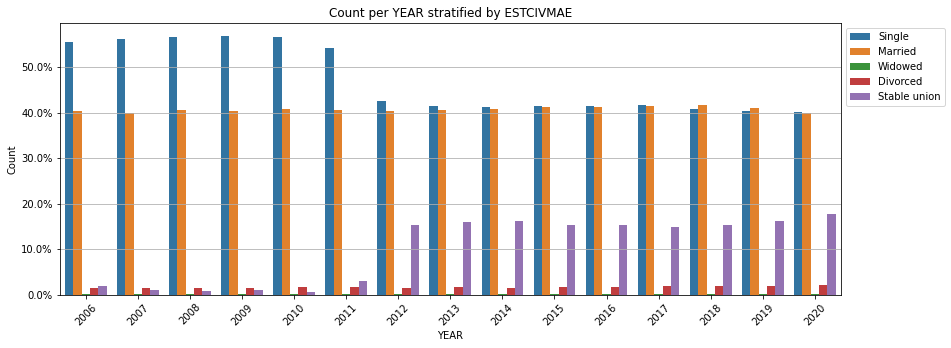

In [24]:
pct_plot(df, "YEAR", "ESTCIVMAE", percentage=True);

Aqui verifica-se que o percentual de mães com mais de 12 anos de escolaridade vem aumentando aos poucos durante o período.

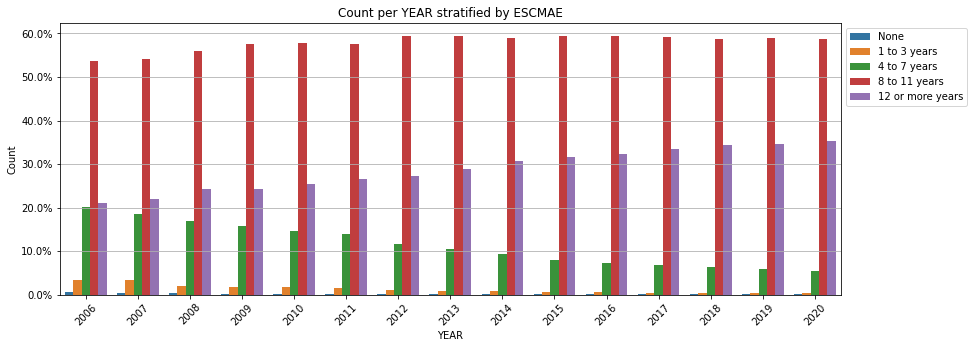

In [25]:
pct_plot(df, "YEAR", "ESCMAE", percentage=True);

Este gráfico mostra que a proporção de partos que são feitos por cesárea é consistentemente similar à proporção de partos "normais".

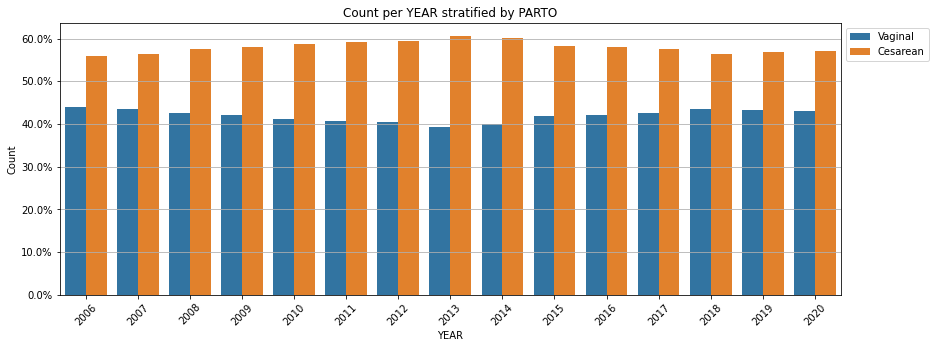

In [26]:
pct_plot(df, "YEAR", "PARTO", percentage=True);

Aqui verifica-se o número de nascidos vivos por ano e por mês. Pode-se ver que o número de nascidos vivos em 2020 chega a ser 10% menor que o mesmo mês no ano anterior. Existe certa dúvida de se esse número seria o esperado para o período, dada a tendência dos anos, ou se esse número possa ser um resultado da pandemia de COVID-19. Esta dúvida é exatamente um dos questionamentos do projeto.

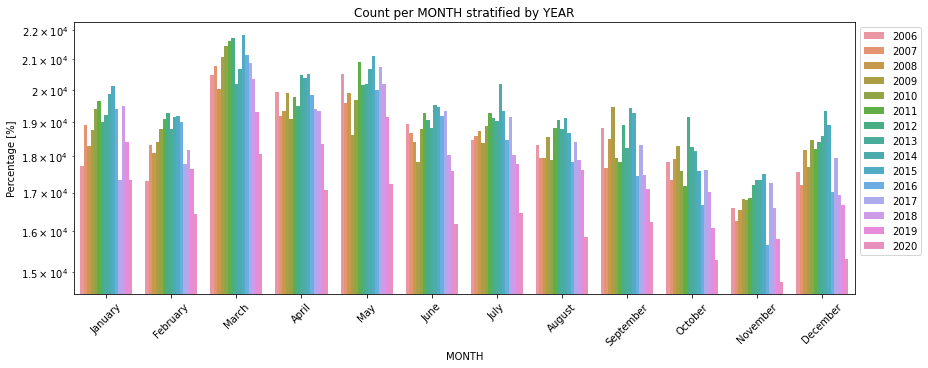

In [27]:
pct_plot(df, "MONTH", "YEAR", percentage=False, y_logscale=True);

Neste gráfico de barras pode-se observar certos aspectos da sazonalidade do número de nascidos.

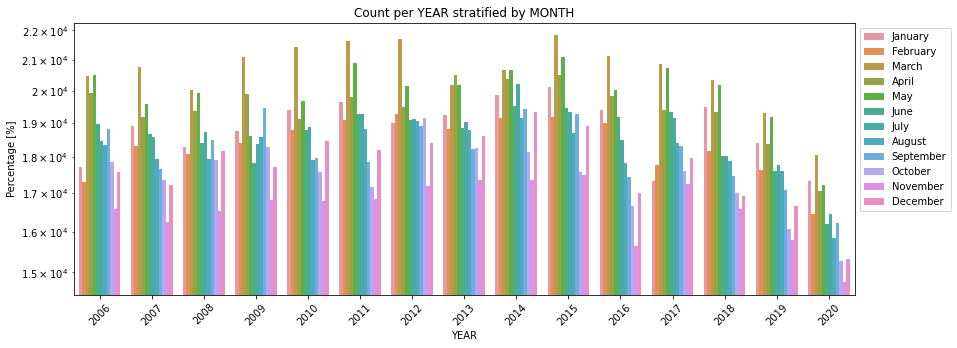

In [28]:
pct_plot(df, "YEAR", "MONTH", percentage=False, y_logscale=True);

Neste gráfico verifica-se que a raça/cor amarela (asiática) é a que mais tem mães acima de 35 anos, enquanto a indígena é a que mais tem mães abaixo de 20 anos.

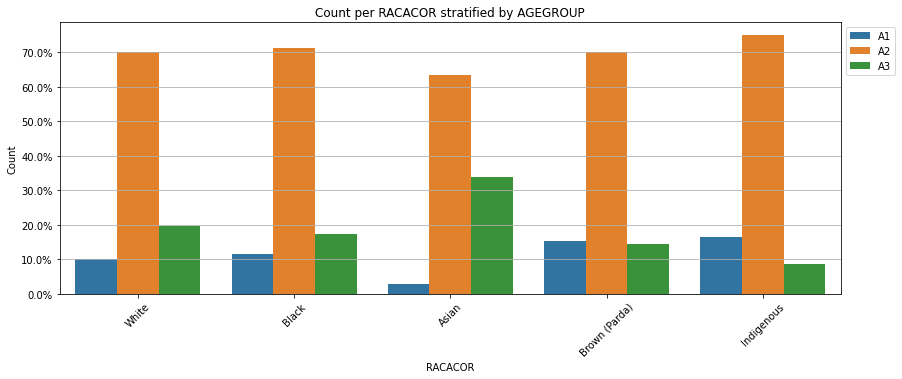

In [29]:
pct_plot(df, "RACACOR", "AGEGROUP", percentage=True);

# Ano de 2020

Para observamos se houve mudança no comportamento do número de nascidos nos meses de novembro e dezembro de 2020, podemos plotar alguns destes gráficos apenas para o ano de 2020.

Visualmente parece não haver diferença significativa. Posteriormente no projeto utilizaremos métodos estatísticos e testes de hipótese para tal avaliação.

In [30]:
df2020 = df[df.YEAR == 2020]

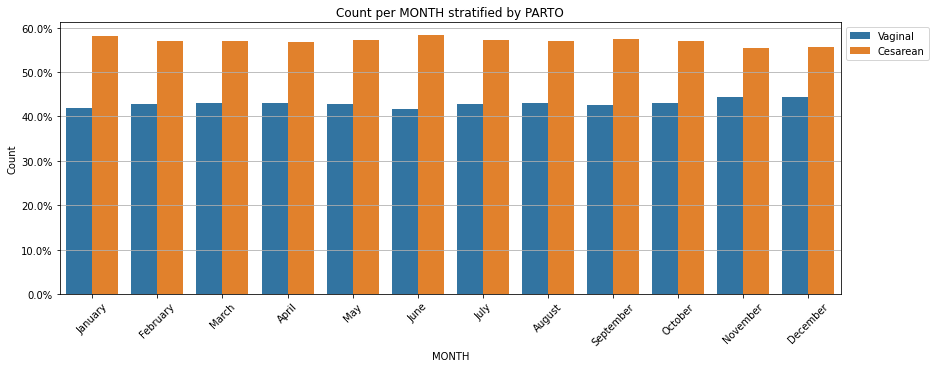

In [31]:
pct_plot(df2020, "MONTH", "PARTO", percentage=True);

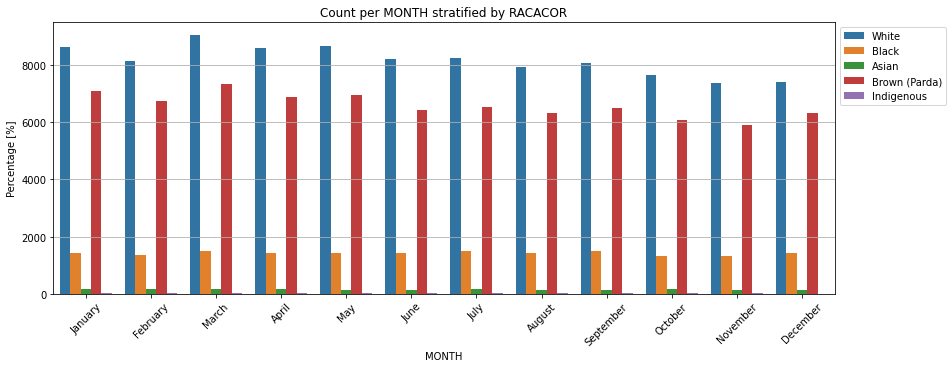

In [32]:
pct_plot(df2020, "MONTH", "RACACOR", percentage=False);

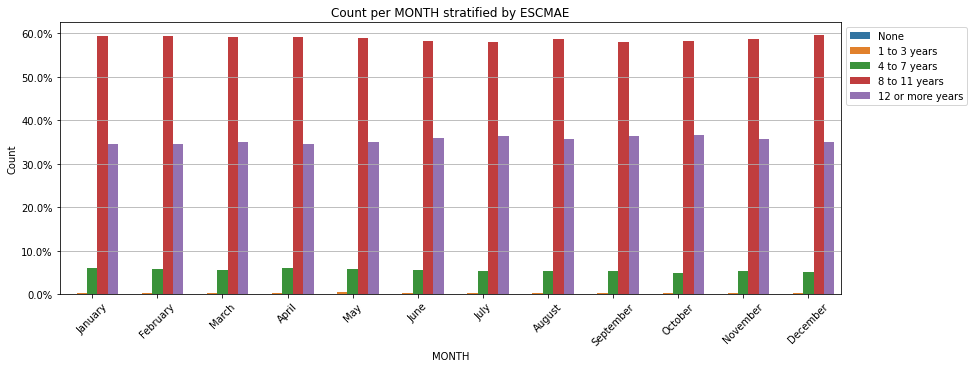

In [33]:
pct_plot(df2020, "MONTH", "ESCMAE", percentage=True);

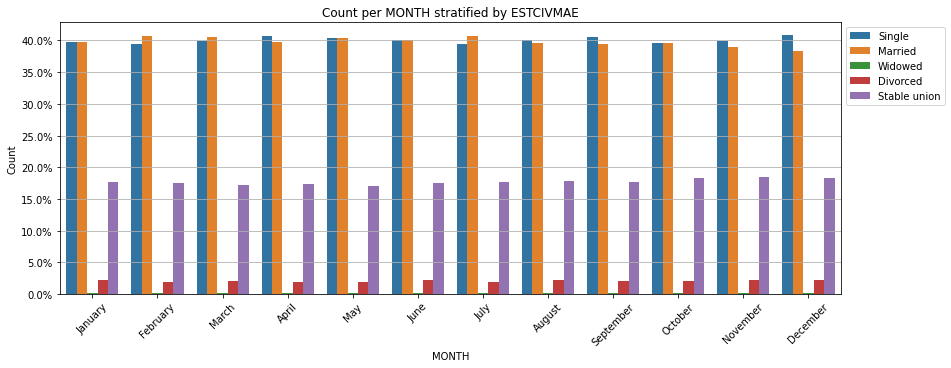

In [34]:
pct_plot(df2020, "MONTH", "ESTCIVMAE", percentage=True);

Podemos, a fim de análise, verificar se há correlação entre a idade das mães e o número de filhos que ela já teve, vivos ou mortos. Verifica-se uma correlação fraca entre a idade e a quantidade de filhos vivos, e não há correlação entre as demais combinações de variáveis.

In [35]:
df[["IDADEMAE", "QTDFILVIVO", "QTDFILMORT"]].corr(method="spearman")

,IDADEMAE,QTDFILVIVO,QTDFILMORT
IDADEMAE,1.000000,0.331662,0.161440
QTDFILVIVO,0.331662,1.000000,0.139269
QTDFILMORT,0.161440,0.139269,1.000000


In [36]:
df[np.bitwise_and(df.MUNNAME == 'São Paulo', df.MONTH == 'April')].groupby(["YEAR", "MONTH"]).count().sort_values(by=["YEAR", "MONTH"]).DTNASC

YEAR  MONTH
2006  April    16979
2007  April    16397
2008  April    16520
2009  April    16919
2010  April    16150
2011  April    16767
2012  April    16318
2013  April    17126
2014  April    17034
2015  April    17295
2016  April    16943
2017  April    16364
2018  April    16106
2019  April    15326
2020  April    14199
Name: DTNASC, dtype: int64

In [37]:
from datetime import datetime as dt

pd.set_option('display.max_rows', 1000)

def create_folds_sequential(df, intervals, n_months=3, city="São Paulo", use_year=False):
  df = df.copy()
  
  if city:
    df = df[df.MUNNAME == city]
  df = df.groupby(["YEAR", "MONTH"]).count().sort_values(by=["YEAR", "MONTH"]).reset_index()
  df.MONTH = df.MONTH.apply(lambda d: dt.strptime(d, "%B").month)

  X, Y = list(), list()

  for start, end in intervals:
    start_date = dt.strptime(start, "%Y-%m-%d")
    end_date = dt.strptime(end, "%Y-%m-%d")

    for i in range(n_months, len(df)):
      year, month, cnt = df[["YEAR", "MONTH", "DTNASC"]].values[i]
      date = dt(year, month, 1)
      cond = (date >= start_date) and (date <= end_date)
      if not cond:
        continue
      month_categorical = [0] * 12
      month_categorical[month - 1] = 1
      previous_months = list(df.DTNASC.values[i - n_months:i])
      current_month = df.DTNASC.values[i]

      features = previous_months + month_categorical
      if use_year:
        features += [year - 2015]
      X.append(
        features
      )
      Y.append(
          current_month
      )
  X, Y = np.stack(X), np.array(Y)
  return X, Y


def create_folds_by_month(df, intervals, n_months=3, city="São Paulo", use_year=False):
  df = df.copy()
  
  if city:
    df = df[df.MUNNAME == city]
  df = df.groupby(["YEAR", "MONTH"]).count().sort_values(by=["YEAR", "MONTH"]).reset_index()
  df.MONTH = df.MONTH.apply(lambda d: dt.strptime(d, "%B").month)

  X, Y = list(), list()
  
  for start, end in intervals:
    start_date = dt.strptime(start, "%Y-%m-%d")
    end_date = dt.strptime(end, "%Y-%m-%d")
    for month in df.MONTH.unique():
      df_ = df[df.MONTH == month]
      for i in range(n_months, len(df_)):
        year, month, cnt = df_[["YEAR", "MONTH", "DTNASC"]].values[i]
        date = dt(year, month, 1)
        cond = (date >= start_date) and (date <= end_date)
    
        if not cond:
          continue

        month_categorical = [0] * 12
        month_categorical[month - 1] = 1
        previous_months = list(df_.DTNASC.values[i - n_months:i])
        current_month = df_.DTNASC.values[i]
        features = previous_months + month_categorical
        if use_year:
          features += [year - 2015]
        X.append(
             features
        )
        Y.append(
            current_month
        )
  X, Y = np.stack(X), np.array(Y)
  return X, Y


def create_folds_seq_with_year(df, intervals, n_months=3, city="São Paulo", use_year=False):
  df = df.copy()
  
  if city:
    df = df[df.MUNNAME == city]
  df = df.groupby(["YEAR", "MONTH"]).count().sort_values(by=["YEAR", "MONTH"]).reset_index()
  df.MONTH = df.MONTH.apply(lambda d: dt.strptime(d, "%B").month)
  df["DATE"] = df[["MONTH", ]]

  X, Y = list(), list()
  
  for start, end in intervals:
    start_date = dt.strptime(start, "%Y-%m-%d")
    end_date = dt.strptime(end, "%Y-%m-%d")
    for month in df.MONTH.unique():
      df_ = df[df.MONTH == month]
      for i in range(n_months, len(df_)):
        year, month, cnt = df_[["YEAR", "MONTH", "DTNASC"]].values[i]
        date = dt(year, month, 1)
        cond = (date >= start_date) and (date <= end_date)
    
        if not cond:
          continue

        month_categorical = [0] * 12
        month_categorical[month - 1] = 1
        previous_months = list(df_.DTNASC.values[i - n_months:i])
        current_month = df_.DTNASC.values[i]
        features = previous_months + month_categorical
        if use_year:
          features += [year - 2015]
        X.append(
             features
        )
        Y.append(
            current_month
        )
  X, Y = np.stack(X), np.array(Y)
  return X, Y

def create_folds_simple(df, intervals, city="São Paulo"):
  df = df.copy()
  
  if city:
    df = df[df.MUNNAME == city]
  df = df.groupby(["YEAR", "MONTH"]).count().sort_values(by=["YEAR", "MONTH"]).reset_index()
  df.MONTH = df.MONTH.apply(lambda d: dt.strptime(d, "%B").month)

  X, Y = list(), list()
  
  for start, end in intervals:
    start_date = dt.strptime(start, "%Y-%m-%d")
    end_date = dt.strptime(end, "%Y-%m-%d")
    for i in range(len(df)):
      year, month, cnt = df[["YEAR", "MONTH", "DTNASC"]].values[i]
      date = dt(year, month, 1)
      cond = (date >= start_date) and (date <= end_date)
  
      if not cond:
        continue

      month_categorical = [0] * 12
      month_categorical[month - 1] = 1
      current_month = df.DTNASC.values[i]
      features = month_categorical
      features += [year - 2015]
      X.append(
            features
      )
      Y.append(
          current_month
      )
  X, Y = np.stack(X), np.array(Y)
  return X, Y


def create_folds_poly(df, intervals, city="São Paulo"):
  df = df.copy()
  
  if city:
    df = df[df.MUNNAME == city]
  df = df.groupby(["YEAR", "MONTH"]).count().sort_values(by=["YEAR", "MONTH"]).reset_index()
  df.MONTH = df.MONTH.apply(lambda d: dt.strptime(d, "%B").month)

  X, Y = list(), list()
  
  for start, end in intervals:
    start_date = dt.strptime(start, "%Y-%m-%d")
    end_date = dt.strptime(end, "%Y-%m-%d")
    for i in range(len(df)):
      year, month, cnt = df[["YEAR", "MONTH", "DTNASC"]].values[i]
      date = dt(year, month, 1)
      cond = (date >= start_date) and (date <= end_date)
  
      if not cond:
        continue

      current_month = df.DTNASC.values[i]
      features = [(month - 1) ** d for d in range(1, 4)]
      features += [year - 2005]
      X.append(
            features
      )
      Y.append(
          current_month
      )
  X, Y = np.stack(X), np.array(Y)
  return X, Y




FOLDS = [
  # {
  #   "train": [
  #     ("2005-01-01", "2015-12-31"),
  #   ],
  #   "test": [
  #     ("2016-01-01", "2017-12-31"),             
  #   ]
  # },
  # {
  #   "train": [
  #     ("2005-01-01", "2015-12-31"),
  #   ],
  #   "test": [
  #     ("2020-06-01", "2020-12-31"),             
  #   ]
  # },
  {
    "train": [
      ("2005-01-01", "2015-12-31"),
      ("2018-01-01", "2020-06-30"),
    ],
    "test": [
      ("2020-06-01", "2020-12-31"),             
    ]
  },
  {
    "train": [
      ("2005-01-01", "2020-05-31"),
    ],
    "test": [
      ("2020-06-01", "2020-12-31"),             
    ]
  },
]


In [185]:
from dateutil.relativedelta import relativedelta

def create_folds_seq_with_year(df, intervals, n_months=3, n_years=2, city=None, use_year=False, month_poly_degree=None):
  df = df.copy()
  
  if city:
    df = df[df.MUNNAME == city]
  df = df.groupby(["YEAR", "MONTH"]).count().sort_values(by=["YEAR", "MONTH"]).reset_index()
  df.MONTH = df.MONTH.apply(lambda d: dt.strptime(d, "%B").month)
  df["DATE"] = df[["YEAR", "MONTH"]].apply(lambda x: dt(x[0], x[1], 1), axis=1)
  df = df[["YEAR", "MONTH", "DATE", "DTNASC"]]
  X, Y = list(), list()
  
  for start, end in intervals:
    start_date = dt.strptime(start, "%Y-%m-%d")
    end_date = dt.strptime(end, "%Y-%m-%d")

    for _, (year, month, date, cnt) in df.iterrows():
      date = dt(year, month, 1)
      if not (date >= start_date) and (date <= end_date):
        continue
      features = list()
      if use_year:
        features.append(year - 2000)
      missing_date = False
      for i in range(n_months):
        query_date = date - relativedelta(months=i+1)
        query_df = df[df.DATE == query_date]
        if len(query_df) == 0:
          missing_date = True
          break
        else:
          features.append(query_df["DTNASC"].item())
      for i in range(n_years):
        query_date = date - relativedelta(years=i+1)
        query_df = df[df.DATE == query_date]
        if len(query_df) == 0:
          missing_date = True
          break
        else:
          features.append(query_df["DTNASC"].item())
      if missing_date:
        continue
      
      if month_poly_degree:
        month_features = [month ** i for i in range(1, month_poly_degree)]
      else:
        month_features = [0] * 12
        month_features[month - 1] = 1
      
      features.extend(month_features)
      X.append(features)
      Y.append(cnt)
  X, Y = np.stack(X), np.array(Y).reshape(-1, 1)
  return X, Y


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(abs(y_true - y_pred) / y_true)

def evaluate(y_true, y_pred):
  metrics = {
      "R2": r2_score(y_true, y_pred),
      "MAE": mean_absolute_error(y_true, y_pred),
      "MSE": mean_squared_error(y_true, y_pred) ** .5,
      "MAPE": mean_absolute_percentage_error(y_true, y_pred)
  }
  return metrics


In [ ]:
N_YEARS = 2
N_MONTHS = 4
USE_YEAR = True
results = []
for i, fold in enumerate(FOLDS):
  result_dict = dict()
  for city in df.MUNNAME.unique():
  # for city in ["São Paulo"]:
    train_intervals, test_intervals = fold["train"], fold["test"]
    x_train, y_train = create_folds_seq_with_year(df, train_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=USE_YEAR)
    x_test, y_test = create_folds_seq_with_year(df, test_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=USE_YEAR)

    scaler = StandardScaler()

    model = LinearRegression()
    model.fit(x_train, y_train)
    r_test = evaluate(y_test, model.predict(x_test))
    r_train = evaluate(y_train, model.predict(x_train))

    result_dict[city] = {
        "model": model,
        "train": r_train,
        "test": r_test,
    }


    # fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    # ax1, ax2 = axes

    # ax1.plot(y_train, label="Target")
    # ax1.plot(model.predict(x_train), label="Prediction")
    # ax1.set_title("Train results")

    # ax2.plot(y_test, label="Target")
    # ax2.plot(model.predict(x_test), label="Prediction")
    # ax2.set_title("Test results")
    # plt.legend()

    # fig.suptitle(city, y=1.05)
    # plt.show()
  results.append(result_dict)

for i in range(len(results)):
  print(f"Fold {i}: {FOLDS[i]}")
  for city in results[i].keys():
    print(f"\tCity: {city}")
    print("\t\tR2:{:.2f},MAPE:{:.2f}".format(results[i][city]["train"]["R2"], results[i][city]["train"]["MAPE"]))
    print("\t\tR2:{:.2f},MAPE:{:.2f}".format(results[i][city]["test"]["R2"], results[i][city]["test"]["MAPE"]))


0
	 Andradina


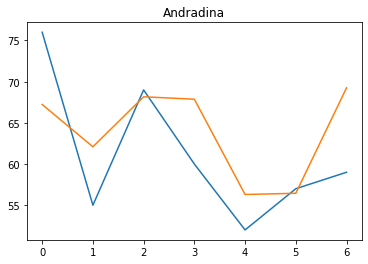

	 Araãatuba


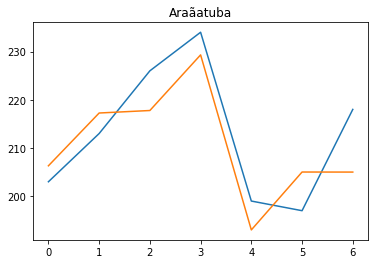

	 Barueri


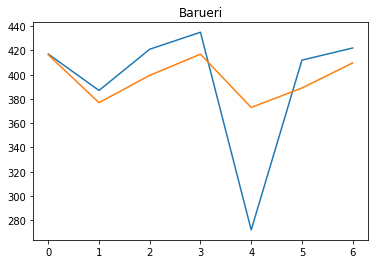

	 São Paulo


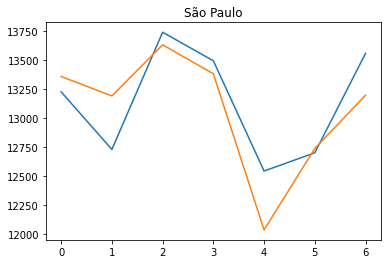

	 Dracena


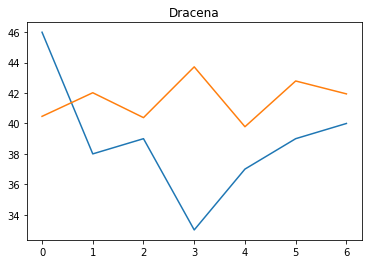

	 Guaãra


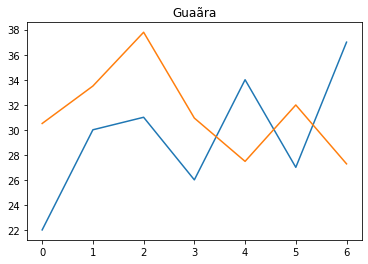

	 Jales


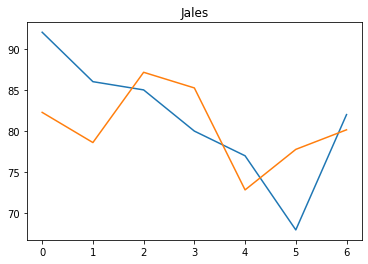

	 Santa Isabel


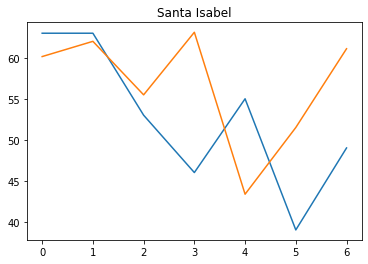

	 Santos


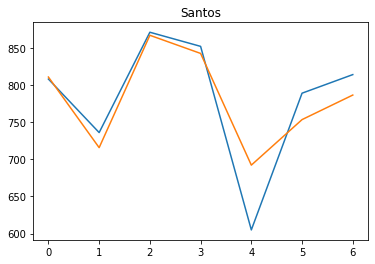

	 São Caetano do Sul


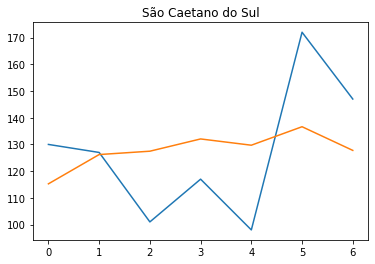

	 São Josã do Rio Preto


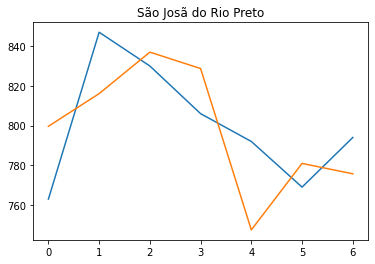

In [239]:
# for i in range(len(results)):
for i in [1]:
  print(i)
  for city in results[i].keys():
    model = results[i][city]["model"]
    x_train, y_train = create_folds_seq_with_year(df, train_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=USE_YEAR)
    x_test, y_test = create_folds_seq_with_year(df, test_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=USE_YEAR)
    print("\t", city)
    plt.plot(y_test)
    plt.plot(model.predict(x_test))
    plt.title(city)
    plt.show()
    

In [ ]:
import torch
from torch import nn
from torch.optim import SGD, Adam
from torch.utils.data import DataLoader, Dataset
import time
import copy
from sklearn.model_selection import train_test_split

class PopModel(nn.Module):
  def __init__(self, n_features=10):
    super().__init__()
    self.n_features = n_features
    self.build()

  def build(self):
    # self.a = nn.Parameter(torch.Tensor([5]))
    # self.b = nn.Parameter(torch.Tensor([20]))
    # self.year_0  = nn.Parameter(torch.Tensor([5]))
    self.layer = nn.Linear(self.n_features, 1)
    # self.layer = nn.Sequential(
    #   nn.Linear(self.n_features, self.n_features // 2),
    #   nn.ReLU(),
    #   nn.Linear(self.n_features // 2, 1),
    # )
  def forward(self, x):
    # year = x[:, [0]]
    # year -= self.a
    # year_component = self.year_0 ** 2 * year / (1 + (year/self.b) ** 2)
    embed = self.layer(x)
    return embed

  def predict(self, x):
    self.eval()
    pred = self.forward(x)
    return pred


def train_model(model, criterion, optimizer, scheduler=None, num_epochs=25, max_patience=10, device="cpu", verbose=False):
    since = time.time()
    LOSS_train, LOSS_val = list(), list()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e20
    patience = 0
    patience_stop = False
    for epoch in range(num_epochs):
        if patience_stop: 
            break

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                
            if phase == 'train' and scheduler:
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]

            if (epoch % 10) == 0 and verbose:
              if phase == "train":
                print('-' * 10)
                print('Epoch {}/{}'.format(epoch, num_epochs - 1))
              
              print('\t{} Loss: {:.4f}'.format(phase, epoch_loss))

            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())
                patience = 0
            elif phase == "val":
                patience += 1
                if patience > max_patience:
                    patience_stop = True

            if phase == 'train':
                LOSS_train.append(epoch_loss)
            if phase == 'val':
                LOSS_val.append(epoch_loss)        

    time_elapsed = time.time() - since
    if patience_stop:
        print(f"Stopped due to patience exceeding {max_patience}")
    print('Best val loss: {:4f}'.format(best_loss))
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

def create_dataloader(x, y, batch_size=8):
  x = torch.Tensor(x).float()
  y = torch.Tensor(y).float()
  return DataLoader(list(zip(x, y)), batch_size=batch_size)

x_train, y_train = create_folds_seq_with_year(df, train_intervals, n_months=4, n_years=2, city=city, use_year=True)
x_test, y_test = create_folds_seq_with_year(df, test_intervals, n_months=4, n_years=2, city=city, use_year=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.3)

dataloaders = dict(
    train=create_dataloader(x_train, y_train),
    val=create_dataloader(x_val, y_val),
    test=create_dataloader(x_test, y_test),
)
dataset_sizes = dict(
    train=len(x_train),
    val=len(x_val),
    test=len(x_test),
)

from torch_optimizer import radam

model = PopModel(x_train.shape[1])
# optimizer = Adam(model.parameters(), lr=0.001)
optimizer = radam.RAdam(model.parameters(), lr=0.001)

train_model(model, nn.MSELoss(), optimizer, num_epochs=1000)

pred = model(torch.from_numpy(x_test).float()).detach().numpy()
print(evaluate(pred, y_test))

N_YEARS = 2
N_MONTHS = 6
results = []
for i, fold in enumerate(FOLDS):
  result_dict = dict()
  for city in df.MUNNAME.unique():
  # for city in ["São Paulo"]:
    train_intervals, test_intervals = fold["train"], fold["test"]
    x_train, y_train = create_folds_seq_with_year(df, train_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=True)
    x_test, y_test = create_folds_seq_with_year(df, test_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.3)

    dataloaders = dict(
        train=create_dataloader(x_train, y_train),
        val=create_dataloader(x_val, y_val),
        test=create_dataloader(x_test, y_test),
    )
    dataset_sizes = dict(
        train=len(x_train),
        val=len(x_val),
        test=len(x_test),
    )

    model = PopModel(x_train.shape[1])
    optimizer = Adam(model.parameters(), lr=0.1)
    train_model(model, nn.MSELoss(), optimizer, num_epochs=5000, max_patience=50)
    
    pred_train = model(torch.from_numpy(x_train).float()).detach().numpy()
    pred_test = model(torch.from_numpy(x_test).float()).detach().numpy()

    r_test = evaluate(y_test, pred_test)
    r_train = evaluate(y_train, pred_train)

    result_dict[city] = {
        "model": model,
        "train": r_train,
        "test": r_test,
    }

  results.append(result_dict)

for i in range(len(results)):
  print(f"Fold {i}: {FOLDS[i]}")
  for city in results[i].keys():
    print(f"\tCity: {city}")
    print("\t\tR2:{:.2f},MAPE:{:.2f}".format(results[i][city]["train"]["R2"], results[i][city]["train"]["MAPE"]))
    print("\t\tR2:{:.2f},MAPE:{:.2f}".format(results[i][city]["test"]["R2"], results[i][city]["test"]["MAPE"]))


1
	 Andradina


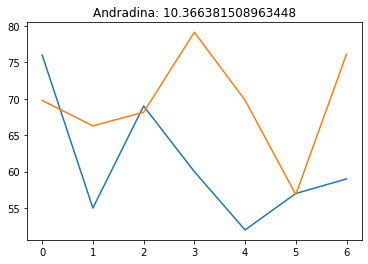

	 Araãatuba


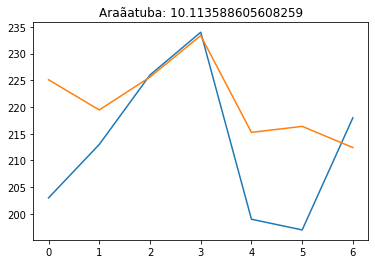

	 Barueri


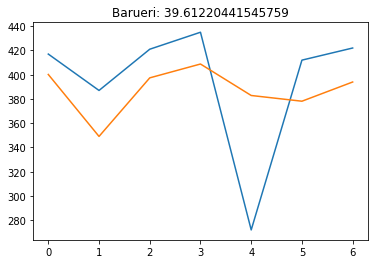

	 São Paulo


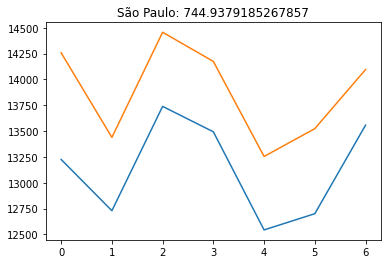

	 Dracena


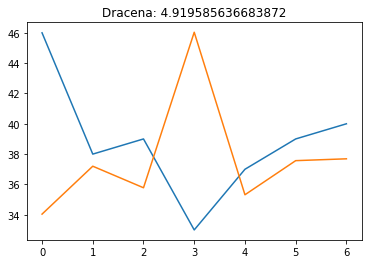

	 Guaãra


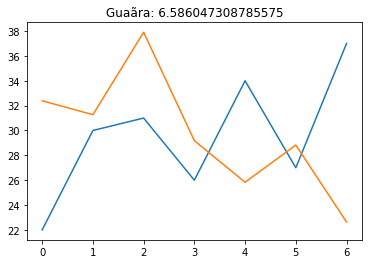

	 Jales


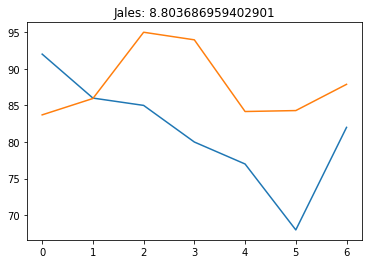

	 Santa Isabel


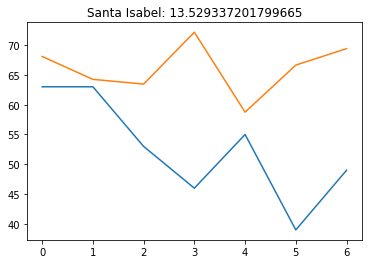

	 Santos


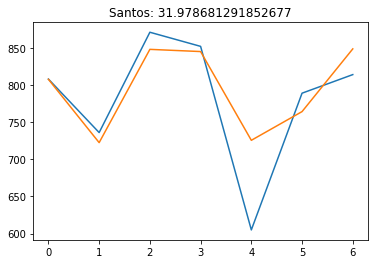

	 São Caetano do Sul


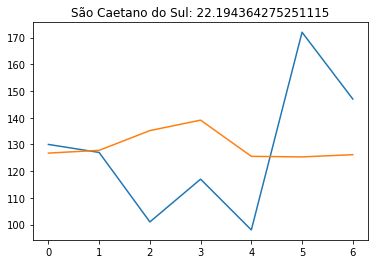

	 São Josã do Rio Preto


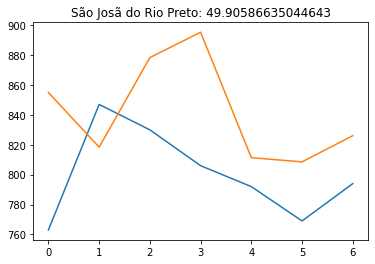

In [243]:
# for i in range(len(results)):
for i in [1]:
  print(i)
  for city in results[i].keys():
    x_train, y_train = create_folds_seq_with_year(df, train_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=USE_YEAR)
    x_test, y_test = create_folds_seq_with_year(df, test_intervals, n_months=N_MONTHS, n_years=N_YEARS, city=city, use_year=USE_YEAR)
    model = results[i][city]["model"]
    pred = model(torch.from_numpy(x_test).float()).detach().numpy()
    print("\t", city)
    plt.plot(y_test)
    plt.plot(pred)
    plt.title(city + ": {}".format(mean_absolute_error(y_pred=pred, y_true=y_test)))
    plt.show()
    

In [188]:
x_train[10], y_train[10]

(array([13,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]), array([700]))

In [169]:
for i in results:
  print(i)
  for city in results[i].keys():
    model = results[i]["model"]

{'Andradina': {'model': PopModel(
  (layer): Linear(in_features=18, out_features=1, bias=True)
), 'train': {'R2': 0.2825546388544282, 'MAE': 9.195036902356504, 'MSE': 11.746870396877842, 'MAPE': 0.12138075887532201}, 'test': {'R2': -0.6630423710869788, 'MAE': 8.892056601388115, 'MSE': 10.070334899896796, 'MAPE': 0.1524475712913901}}, 'Araãatuba': {'model': PopModel(
  (layer): Linear(in_features=18, out_features=1, bias=True)
), 'train': {'R2': 0.3831046695645248, 'MAE': 15.495484081666861, 'MSE': 19.231948618388557, 'MAPE': 0.06816832296219892}, 'test': {'R2': 0.09886632633008063, 'MAE': 10.119633265904017, 'MSE': 12.360749730291104, 'MAPE': 0.04930971759802842}}, 'Barueri': {'model': PopModel(
  (layer): Linear(in_features=18, out_features=1, bias=True)
), 'train': {'R2': 0.7806387633367794, 'MAE': 25.63382367945429, 'MSE': 32.964219612400576, 'MAPE': 0.05314181386629698}, 'test': {'R2': -0.03909880208907901, 'MAE': 29.409650530133927, 'MSE': 53.06679743728101, 'MAPE': 0.095934481791

TypeError: ignored

In [123]:

for x, y in dataloaders["train"]:
  print(x.size(), y.size())
  print(model(x).size())
  break

torch.Size([4, 19]) torch.Size([4])
torch.Size([4, 19])


In [ ]:
N = 2
results = []
for i, fold in enumerate(FOLDS):
  result_dict = dict()
  for city in df.MUNNAME.unique():
  # for city in ["São Paulo"]:
    train_intervals, test_intervals = fold["train"], fold["test"]
    x_train, y_train = create_folds_by_month(df, train_intervals, n_months=N, city=city)
    x_test, y_test = create_folds_by_month(df, test_intervals, n_months=N, city=city)

    scaler = StandardScaler()

    model = LinearRegression()
    model.fit(x_train, y_train)
    r_test = evaluate(y_test, model.predict(x_test))
    r_train = evaluate(y_train, model.predict(x_train))

    result_dict[city] = {
        "model": model,
        "train": r_train,
        "test": r_test,
    }


    # fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    # ax1, ax2 = axes

    # ax1.plot(y_train, label="Target")
    # ax1.plot(model.predict(x_train), label="Prediction")
    # ax1.set_title("Train results")

    # ax2.plot(y_test, label="Target")
    # ax2.plot(model.predict(x_test), label="Prediction")
    # ax2.set_title("Test results")
    # plt.legend()

    # fig.suptitle(city, y=1.05)
    # plt.show()
  results.append(result_dict)

for i in range(len(results)):
  print(f"Fold {i}: {FOLDS[i]}")
  for city in results[i].keys():
    print(f"\tCity: {city}")
    print("\t\t", results[i][city]["test"]["R2"])

In [ ]:
N = 4
results = []
for i, fold in enumerate(FOLDS):
  result_dict = dict()
  for city in df.MUNNAME.unique():
    train_intervals, test_intervals = fold["train"], fold["test"]
    x_train, y_train = create_folds_sequential(df, train_intervals, n_months=N, city=city)
    x_test, y_test = create_folds_sequential(df, test_intervals, n_months=N, city=city)

    scaler = StandardScaler()

    model = LinearRegression()
    model.fit(x_train, y_train)
    r_test = evaluate(y_test, model.predict(x_test))
    r_train = evaluate(y_train, model.predict(x_train))

    result_dict[city] = {
        "model": model,
        "train": r_train,
        "test": r_test,
    }

  results.append(result_dict)

for i in range(len(results)):
  print(f"Fold {i}: {FOLDS[i]}")
  for city in results[i].keys():
    print(f"\tCity: {city}")
    print("\t\t", results[i][city]["test"]["R2"])

In [ ]:
results = []
for i, fold in enumerate(FOLDS):
  result_dict = dict()
  for city in df.MUNNAME.unique():
    train_intervals, test_intervals = fold["train"], fold["test"]
    x_train, y_train = create_folds_simple(df, train_intervals, city=city)
    x_test, y_test = create_folds_simple(df, test_intervals, city=city)

    scaler = StandardScaler()

    model = LinearRegression()
    model.fit(x_train, y_train)
    r_test = evaluate(y_test, model.predict(x_test))
    r_train = evaluate(y_train, model.predict(x_train))

    result_dict[city] = {
        "model": model,
        "train": r_train,
        "test": r_test,
    }

  results.append(result_dict)

for i in range(len(results)):
  print(f"Fold {i}: {FOLDS[i]}")
  for city in results[i].keys():
    print(f"\tCity: {city}")
    print("\t\t", results[i][city]["test"]["R2"])

In [ ]:
results = []
for i, fold in enumerate(FOLDS):
  result_dict = dict()
  for city in df.MUNNAME.unique():
    train_intervals, test_intervals = fold["train"], fold["test"]
    x_train, y_train = create_folds_poly(df, train_intervals, city=city)
    x_test, y_test = create_folds_poly(df, test_intervals, city=city)

    scaler = StandardScaler()

    model = LinearRegression()
    model.fit(x_train, y_train)
    r_test = evaluate(y_test, model.predict(x_test))
    r_train = evaluate(y_train, model.predict(x_train))

    result_dict[city] = {
        "model": model,
        "train": r_train,
        "test": r_test,
    }


  results.append(result_dict)

for i in range(len(results)):
  print(f"Fold {i}: {FOLDS[i]}")
  for city in results[i].keys():
    print(f"\tCity: {city}")
    print("\t\t", results[i][city]["test"]["R2"])

In [ ]:
x_train.shape, x_test.shape

In [ ]:
N = 2
results = dict()
for city in df.MUNNAME.unique():
  print(f"Fitting model for {city}")
  x_train, y_train = create_fold(df, "2009-01-01", "2015-12-31", n_months=N, city=city)
  x_test, y_test = create_fold(df, "2016-01-01", "2017-12-31", n_months=N, city=city)
  
  print(x_train.shape, x_test.shape)

  scaler = StandardScaler()

  model = LinearRegression()
  model.fit(x_train, y_train)
  r_test = evaluate(y_test, model.predict(x_test))
  r_train = evaluate(y_train, model.predict(x_train))

  results[city] = {
      "model": model,
      "train": r_train,
      "test": r_test,
  }


  fig, axes = plt.subplots(1, 2, figsize=(15, 6))
  ax1, ax2 = axes

  ax1.plot(y_train, label="Target")
  ax1.plot(model.predict(x_train), label="Prediction")
  ax1.set_title("Train results")

  ax2.plot(y_test, label="Target")
  ax2.plot(model.predict(x_test), label="Prediction")
  ax2.set_title("Test results")
  plt.legend()

  fig.suptitle(city, y=1.05)
  plt.show()

for city, city_results in results.items():
  print(city)
  print("\t", city_results["test"])
  model = city_results["model"]
  coefs = ["{:.1f}".format(x) for x in model.coef_]
  print("\t", model.intercept_, coefs)